In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df.drop('car_ID',axis=1,inplace=True)

In [3]:
# Finding all the categorical variables which have only two categories
list_of_two_cat_var=[]

for i in df.columns:
    if df[i].nunique()==2:
        list_of_two_cat_var.append(i)
        
list_of_two_cat_var

['fueltype', 'aspiration', 'doornumber', 'enginelocation']

In [4]:
# Defining the map function
def binary_map1(x):
    value=df['fueltype'].unique()
    if x==value[0]:
        return 1
    else:
        return 0
    
def binary_map2(x):
    value=df['aspiration'].unique()
    if x==value[0]:
        return 1
    else:
        return 0
    
def binary_map3(x):
    value=df['doornumber'].unique()
    if x==value[0]:
        return 1
    else:
        return 0
    
def binary_map4(x):
    value=df['enginelocation'].unique()
    if x==value[0]:
        return 1
    else:
        return 0
    
# Applying the function to the dataframe
df['fueltype'] = df['fueltype'].apply(binary_map1)
df['aspiration'] = df['aspiration'].apply(binary_map2)
df['doornumber'] = df['doornumber'].apply(binary_map3)
df['enginelocation'] = df['enginelocation'].apply(binary_map4)

In [5]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,1,1,1,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,2,audi 100 ls,1,1,0,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,2,audi 100ls,1,1,0,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,2,audi fox,1,1,1,sedan,fwd,1,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,1,audi 100ls,1,1,0,sedan,fwd,1,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,1,audi 5000,1,1,0,wagon,fwd,1,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,1,audi 4000,1,0,0,sedan,fwd,1,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),1,0,1,hatchback,4wd,1,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [6]:
# Transforming the CarName so as to have only Car company name and not the model name
def splitting(x):
    a=x.split('-')
    return' '.join(a)
def firstname(x):
    a=x.split(' ')
    return a[0]

df['CarName']=df.CarName.apply(splitting)
df.CarName=df.CarName.apply(firstname)

#Getting unique values of the CarName column
df.CarName.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
# Renaming the incorrectly spelt names
def rename(x):
    if x == 'Nissan':
        return 'nissan'
    elif x=='maxda':
        return 'mazda'
    elif x=='porcshce':
        return 'porsche'
    elif x=='toyouta':
        return 'toyota'
    elif x in ['vokswagen','vw']:
        return 'volkswagen'
    else:
        return x

df.CarName=df.CarName.apply(rename)

# Outputting the unique values after cleaning the data
df.CarName.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
# listing out all categorical variables that have more than two categories
list_of_many_cat_var=['symboling','CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem']

In [9]:
# Creating a dictionary to see if any other categorical variable needs to be cleaned
dic={}
for i in list_of_many_cat_var:
    dic[i]=list(df[i].unique())
dic

{'symboling': [3, 1, 2, 0, -1, -2],
 'CarName': ['alfa',
  'audi',
  'bmw',
  'chevrolet',
  'dodge',
  'honda',
  'isuzu',
  'jaguar',
  'mazda',
  'buick',
  'mercury',
  'mitsubishi',
  'nissan',
  'peugeot',
  'plymouth',
  'porsche',
  'renault',
  'saab',
  'subaru',
  'toyota',
  'volkswagen',
  'volvo'],
 'carbody': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
 'drivewheel': ['rwd', 'fwd', '4wd'],
 'enginetype': ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'],
 'cylindernumber': ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
 'fuelsystem': ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']}

No need of cleaning up the columns in list_of_many_cat_var

In [10]:
cat_var=list_of_many_cat_var+list_of_two_cat_var

# Listing all numerical variables in one list
num_var=[]
for i in df.columns:
    if i not in cat_var:
        num_var.append(i)

<Figure size 720x720 with 0 Axes>

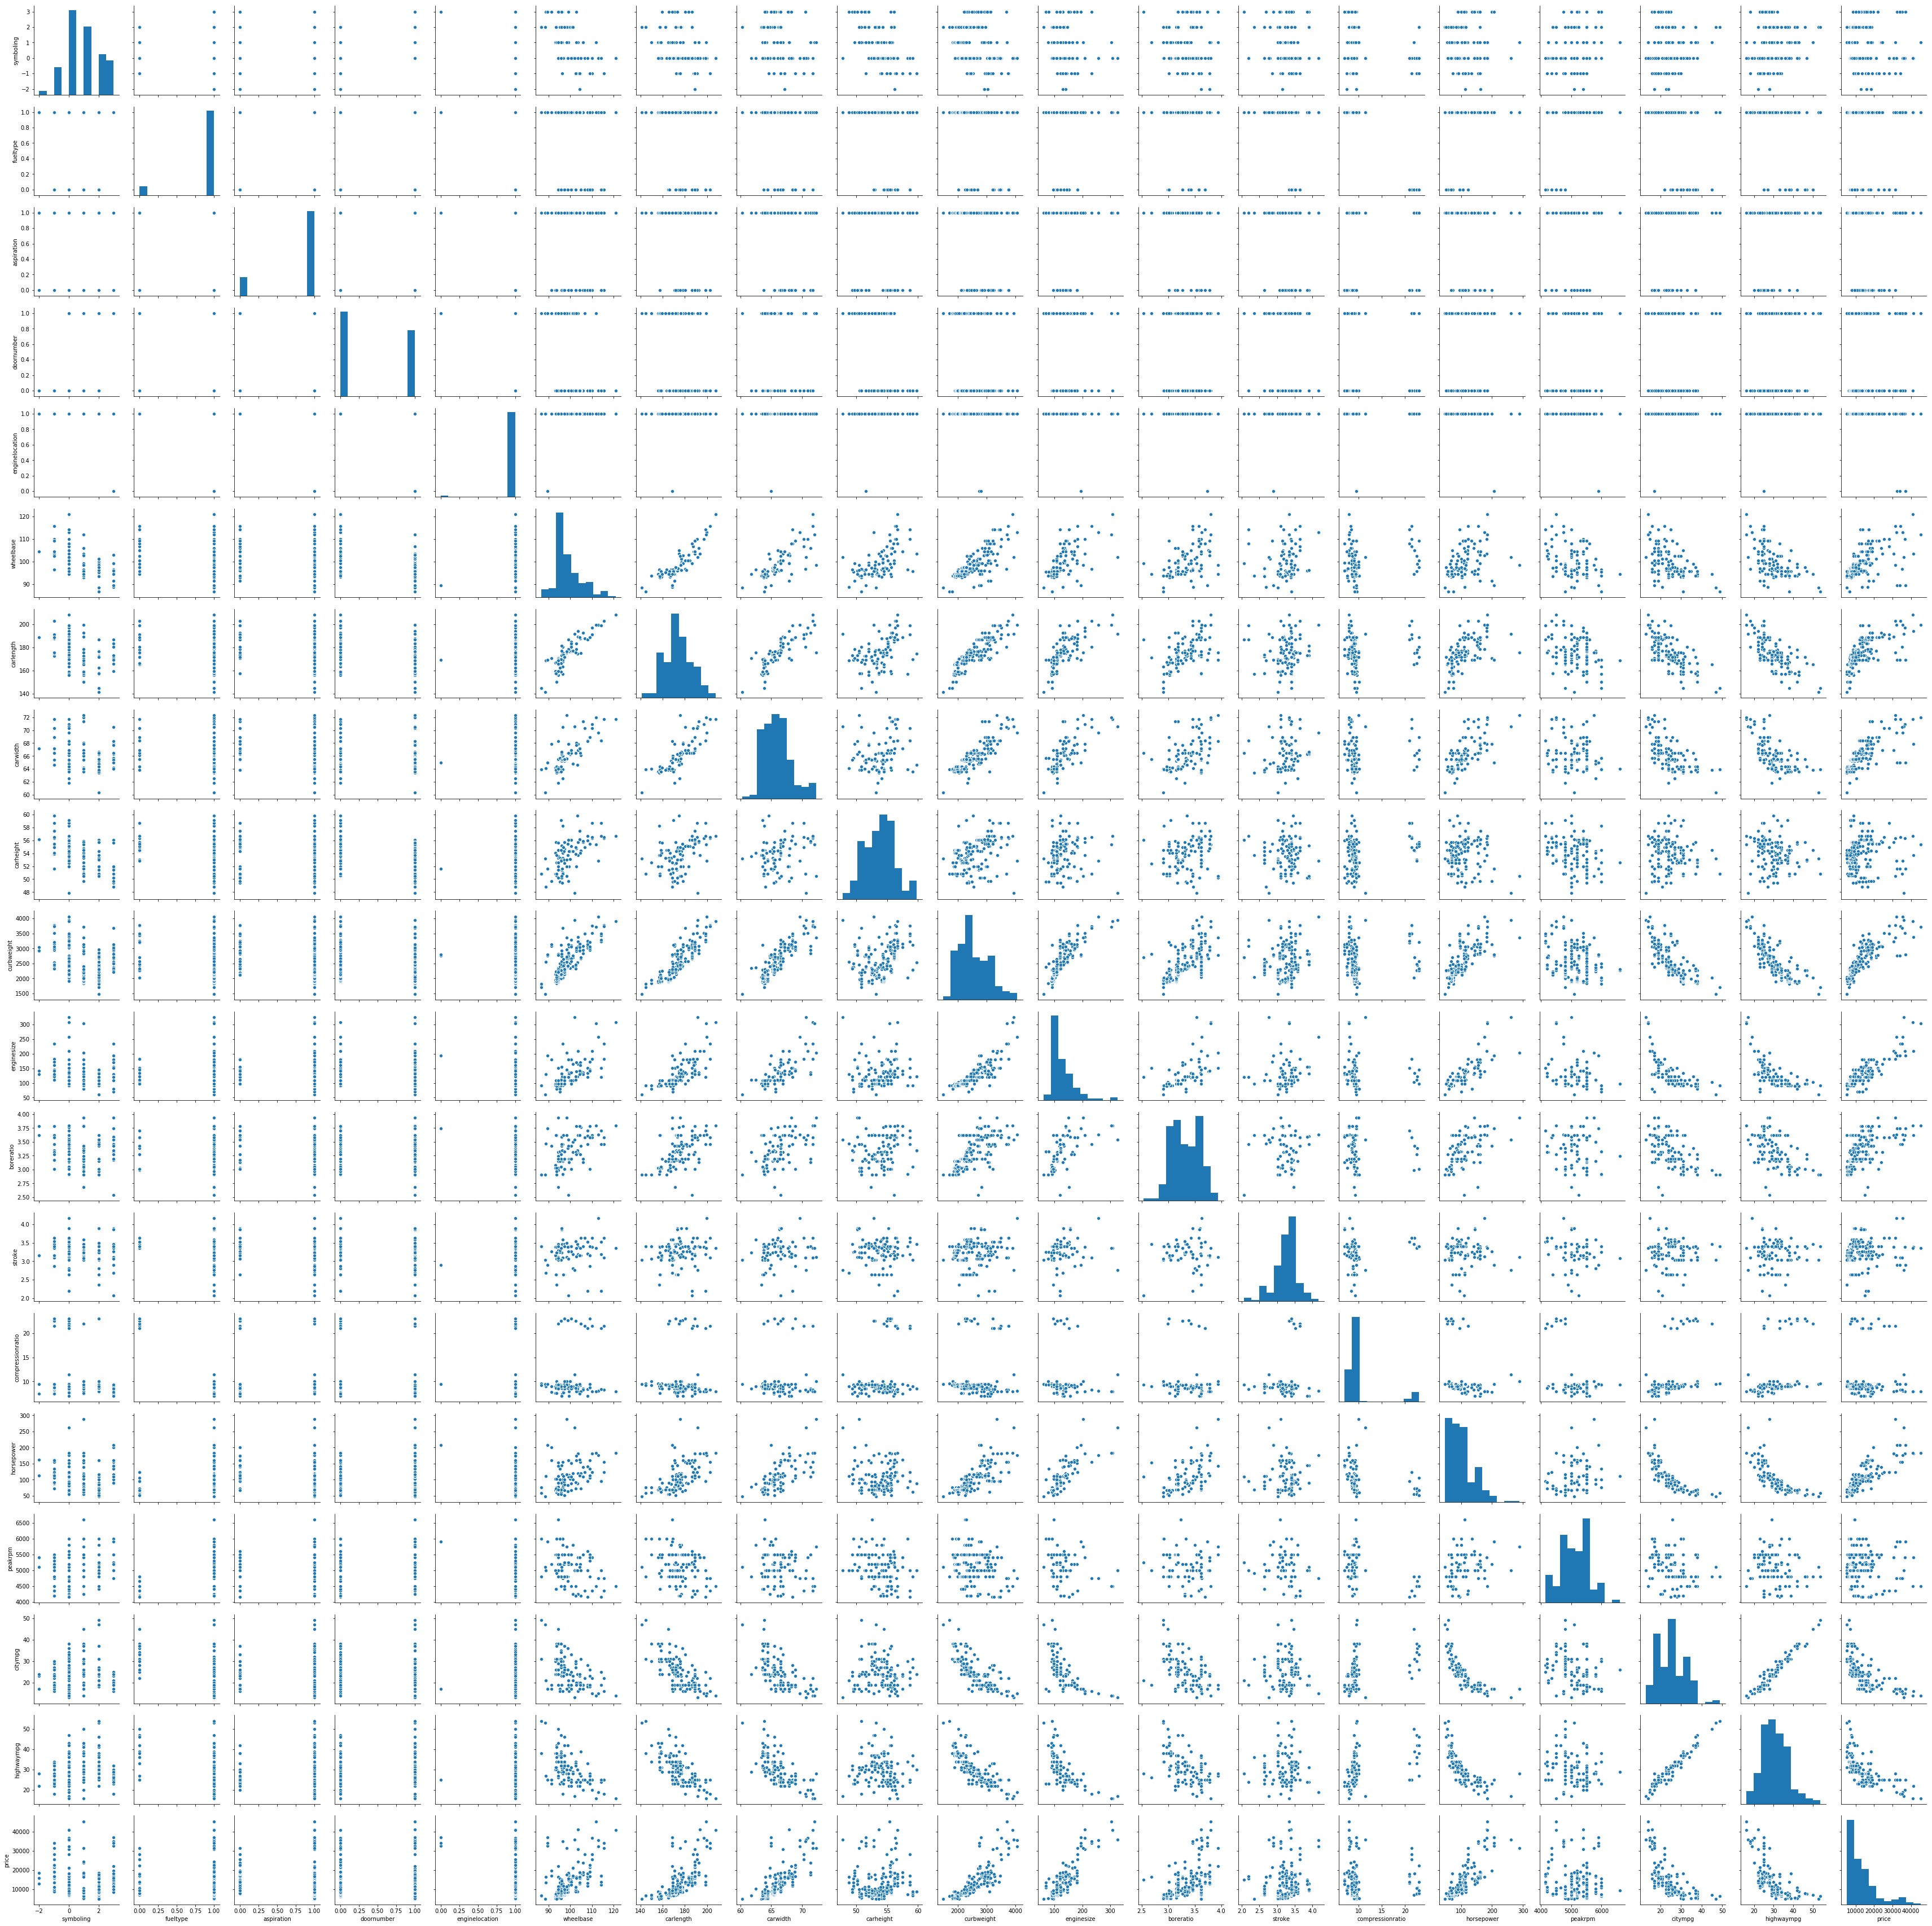

In [11]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [12]:
# creating dummy variables for those variables that have more than two categories
for i in list_of_many_cat_var:
    temp=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,temp],axis=1)
    df.drop(i,axis=1,inplace=True)

In [13]:
# Splitting the data
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

# Scaling all numerical variables
mms=MinMaxScaler()
df_train[num_var]=mms.fit_transform(df_train[num_var])

# Defining the independent and dependent variables
y_train=df_train['price']
x_train=df_train.drop('price',axis=1)

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anupama\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [14]:
# Using RFE to start the model building process
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [15]:
# Creating a RFE model
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, 10) 
rfe = rfe.fit(x_train, y_train)

In [16]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 23),
 ('aspiration', False, 12),
 ('doornumber', False, 51),
 ('enginelocation', True, 1),
 ('wheelbase', False, 13),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 8),
 ('peakrpm', False, 10),
 ('citympg', False, 34),
 ('highwaympg', False, 26),
 (-1, False, 36),
 (0, False, 47),
 (1, False, 49),
 (2, False, 48),
 (3, False, 50),
 ('audi', False, 35),
 ('bmw', True, 1),
 ('buick', False, 43),
 ('chevrolet', False, 22),
 ('dodge', False, 17),
 ('honda', False, 20),
 ('isuzu', False, 44),
 ('jaguar', False, 27),
 ('mazda', False, 39),
 ('mercury', False, 57),
 ('mitsubishi', False, 9),
 ('nissan', False, 41),
 ('peugeot', False, 6),
 ('plymouth', False, 16),
 ('porsche', True, 1),
 ('renault', False, 54),
 ('saab', False, 14),
 ('subaru', False, 46),
 ('toyota', False, 42),
 ('volk

In [17]:
# columns that are supported in the model
col = x_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'bmw', 'porsche', 'three', 'twelve', 'two'],
      dtype='object')

In [18]:
# columns that are not supported in the model
x_train.columns[~rfe.support_]

Index([        'fueltype',       'aspiration',       'doornumber',
              'wheelbase',        'carlength',        'carheight',
                 'stroke', 'compressionratio',       'horsepower',
                'peakrpm',          'citympg',       'highwaympg',
                       -1,                  0,                  1,
                        2,                  3,             'audi',
                  'buick',        'chevrolet',            'dodge',
                  'honda',            'isuzu',           'jaguar',
                  'mazda',          'mercury',       'mitsubishi',
                 'nissan',          'peugeot',         'plymouth',
                'renault',             'saab',           'subaru',
                 'toyota',       'volkswagen',            'volvo',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',              'fwd',              'rwd',
                  'dohcv',                'l',              'o

In [19]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = x_train[col]

# Adding a constant variable
X_train_rfe_sm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train,X_train_rfe_sm).fit() 
print(lr.summary())

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.21e-64
Time:                        21:29:49   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1704      0.084      2.

In [20]:
# Dropping 'twelve' since the p value is high
X_train_1 = X_train_rfe.drop(["twelve"], axis = 1)
X_train1_sm = sm.add_constant(X_train_1)
lr1 = sm.OLS(y_train,X_train1_sm).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.18e-65
Time:                        21:29:49   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

In [21]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,41.03
1,carwidth,34.92
3,enginesize,17.39
4,boreratio,12.52
0,enginelocation,11.07
6,porsche,1.37
8,two,1.20
5,bmw,1.14
7,three,1.06


In [22]:
# Dropping curbweight since it has a high vif value
X_train_2 = X_train_1.drop(["curbweight"], axis = 1)
X_train2_sm = sm.add_constant(X_train_2)
lr2 = sm.OLS(y_train,X_train2_sm).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.01e-63
Time:                        21:29:50   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1849      0.088      2.

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
# Finding the vif values for all the remaining columns in the model
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,21.72
3,boreratio,11.49
0,enginelocation,10.35
2,enginesize,10.35
5,porsche,1.24
7,two,1.16
4,bmw,1.14
6,three,1.06


In [24]:
# Dropping boreratio since it has a high vif value and high p value
X_train_3 = X_train_2.drop(["boreratio"], axis = 1)
X_train3_sm = sm.add_constant(X_train_3)
lr3 = sm.OLS(y_train,X_train3_sm).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.04e-64
Time:                        21:29:50   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1702      0.089      1.

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,20.30
2,enginesize,9.94
0,enginelocation,8.35
6,two,1.15
3,bmw,1.14
4,porsche,1.12
5,three,1.06


In [26]:
# Dropping carwidth since it has a high vif value
X_train_4 = X_train_3.drop(["carwidth"], axis = 1)
X_train4_sm = sm.add_constant(X_train_4)
lr4 = sm.OLS(y_train,X_train4_sm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     121.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.57e-52
Time:                        21:29:51   Log-Likelihood:                 149.08
No. Observations:                 143   AIC:                            -284.2
Df Residuals:                     136   BIC:                            -263.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0427      0.109      0.

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [27]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,4.01
0,enginelocation,3.78
2,bmw,1.11
3,porsche,1.10
5,two,1.08
4,three,1.03


In [28]:
# Dropping three since it has a high p value
X_train_5 = X_train_4.drop(["three"], axis = 1)
X_train5_sm = sm.add_constant(X_train_5)
lr5 = sm.OLS(y_train,X_train5_sm).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.68e-53
Time:                        21:29:51   Log-Likelihood:                 148.60
No. Observations:                 143   AIC:                            -285.2
Df Residuals:                     137   BIC:                            -267.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0454      0.108      0.

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [29]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,3.94
0,enginelocation,3.68
2,bmw,1.11
3,porsche,1.10
4,two,1.08


In [30]:
# Dropping enginelocation since it has a high p value
X_train_6 = X_train_5.drop(["enginelocation"], axis = 1)
X_train6_sm = sm.add_constant(X_train_6)
lr6 = sm.OLS(y_train,X_train6_sm).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           7.97e-54
Time:                        21:29:51   Log-Likelihood:                 147.87
No. Observations:                 143   AIC:                            -285.7
Df Residuals:                     138   BIC:                            -270.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0825      0.014     -5.778      0.0

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.16
1,bmw,1.10
2,porsche,1.06
3,two,1.00


X_train_6 seems to be a good model since it has low vif values and low p values.
Analyzing the above pairplot to find few different columns which can be added to increase the prediction power of the model

In [32]:
# Analyzing pairplot, decided to add citympg to check the performance

X_train_7=pd.concat([X_train_6,df_train['citympg']],axis=1)
X_train7_sm=sm.add_constant(X_train_7)
lr7=sm.OLS(y_train,X_train7_sm).fit()
lr7.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.50e-53
Time:                        21:29:51   Log-Likelihood:                 150.00
No. Observations:                 143   AIC:                            -288.0
Df Residuals:                     137   BIC:                            -270.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0176      0.035     -0.505      0.614      -0.086       0.051
enginesize     1.0711      0.069     15.445      0.000       0.934       1.208
bmw            0.1999      0.037      5.358      0.000       0.126       0.274
porsche        0.2048      0.052      3.945      0.000       0.102       0.307
two            0.2015      0.051      3.955      0.000       0.101       0.302
citympg       -0.1159      0.057     -2.036      0.044      -0.229      -0.003
==============================================================================
Omnibus:                       16.153   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.211
Skew:                           0.660   Prob(JB):                     2.48e-05
Kurtosis:                       4.349   Cond. No.                         14.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.78
4,citympg,1.55
1,bmw,1.11
2,porsche,1.08
3,two,1.00


X_train_7 has a higher adjuster r square and r square value as compared to X_train_6.
Also, this model has low p values and low vif values
As of now, considering X_train_7 to be the model used for predicting

In [34]:
# Analyzing pairplot, decided to add highwaympg to check the performance

X_train_8=pd.concat([X_train_7,df_train['highwaympg']],axis=1)
X_train8_sm=sm.add_constant(X_train_8)
lr8=sm.OLS(y_train,X_train8_sm).fit()
lr8.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     134.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.24e-54
Time:                        21:29:52   Log-Likelihood:                 155.33
No. Observations:                 143   AIC:                            -296.7
Df Residuals:                     136   BIC:                            -275.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.036      0.573      0.567      -0.050       0.091
enginesize     1.0147      0.069     14.649      0.000       0.878       1.152
bmw            0.2184      0.037      5.979      0.000       0.146       0.291
porsche        0.2733      0.054      5.019      0.000       0.166       0.381
two            0.2026      0.049      4.113      0.000       0.105       0.300
citympg        0.4474      0.182      2.457      0.015       0.087       0.807
highwaympg    -0.5883      0.181     -3.245      0.001      -0.947      -0.230
==============================================================================
Omnibus:                       13.270   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.262
Skew:                           0.622   Prob(JB):                     0.000485
Kurtosis:                       4.007   Cond. No.                         42.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,highwaympg,105.11
4,citympg,103.11
0,enginesize,1.80
2,porsche,1.25
1,bmw,1.14
3,two,1.05


After adding highwaympg, the vif values increased drastically so removing highwaympg from the model and adding carlength (based on the pairplot)

In [36]:
X_train_9=pd.concat([X_train_7,df_train['carlength']],axis=1)
X_train9_sm=sm.add_constant(X_train_9)
lr9=sm.OLS(y_train,X_train9_sm).fit()
lr9.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     142.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.81e-56
Time:                        21:29:52   Log-Likelihood:                 159.01
No. Observations:                 143   AIC:                            -304.0
Df Residuals:                     136   BIC:                            -283.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1456      0.044     -3.277      0.001      -0.234      -0.058
enginesize     0.9294      0.073     12.683      0.000       0.784       1.074
bmw            0.2004      0.035      5.698      0.000       0.131       0.270
porsche        0.2697      0.051      5.266      0.000       0.168       0.371
two            0.2186      0.048      4.537      0.000       0.123       0.314
citympg       -0.0053      0.060     -0.088      0.930      -0.123       0.113
carlength      0.2326      0.054      4.274      0.000       0.125       0.340
==============================================================================
Omnibus:                        8.095   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.947
Skew:                           0.494   Prob(JB):                       0.0188
Kurtosis:                       3.598   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,carlength,11.03
0,enginesize,8.76
4,citympg,2.19
2,porsche,1.13
3,two,1.12
1,bmw,1.11


After adding carlength, the vif values increased drastically so removing carlength from the model and adding horsepower (based on the pairplot)

In [38]:
X_train_10=pd.concat([X_train_7,df_train['horsepower']],axis=1)
X_train10_sm=sm.add_constant(X_train_10)
lr10=sm.OLS(y_train,X_train10_sm).fit()
lr10.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.80e-52
Time:                        21:29:52   Log-Likelihood:                 150.07
No. Observations:                 143   AIC:                            -286.1
Df Residuals:                     136   BIC:                            -265.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0256      0.041     -0.624      0.534      -0.107       0.056
enginesize     1.0471      0.095     11.045      0.000       0.860       1.235
bmw            0.2000      0.037      5.342      0.000       0.126       0.274
porsche        0.1939      0.060      3.243      0.001       0.076       0.312
two            0.1986      0.052      3.842      0.000       0.096       0.301
citympg       -0.1020      0.068     -1.493      0.138      -0.237       0.033
horsepower     0.0410      0.110      0.372      0.711      -0.177       0.259
==============================================================================
Omnibus:                       16.137   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.473
Skew:                           0.652   Prob(JB):                     2.17e-05
Kurtosis:                       4.379   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,13.47
5,horsepower,13.15
4,citympg,1.61
2,porsche,1.33
3,two,1.23
1,bmw,1.11


After adding horsepower, the vif values increased drastically so removing horsepower from the model and adding compressionratio (based on the pairplot)

In [40]:
X_train_11=pd.concat([X_train_7,df_train['compressionratio']],axis=1)
X_train11_sm=sm.add_constant(X_train_11)
lr11=sm.OLS(y_train,X_train11_sm).fit()
lr11.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.06e-56
Time:                        21:29:53   Log-Likelihood:                 158.94
No. Observations:                 143   AIC:                            -303.9
Df Residuals:                     136   BIC:                            -283.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0332      0.035      0.951      0.343      -0.036       0.102
enginesize           0.9316      0.073     12.737      0.000       0.787       1.076
bmw                  0.2140      0.035      6.057      0.000       0.144       0.284
porsche              0.2106      0.049      4.302      0.000       0.114       0.307
two                  0.1485      0.050      2.993      0.003       0.050       0.247
citympg             -0.2426      0.061     -3.953      0.000      -0.364      -0.121
compressionratio     0.1427      0.034      4.257      0.000       0.076       0.209
==============================================================================
Omnibus:                       11.337   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.786
Skew:                           0.551   Prob(JB):                      0.00167
Kurtosis:                       3.966   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,2.01
4,citympg,1.96
5,compressionratio,1.96
1,bmw,1.12
2,porsche,1.08
3,two,1.01


X_train_11 is a better model than X_train_7.
X_train_11 has high adjuster R squared value than X_train_7, low p values and low vif values

In [42]:
# Adding peakrpm and checking the performance of the model after the addition
X_train_12=pd.concat([X_train_11,df_train['peakrpm']],axis=1)
X_train12_sm=sm.add_constant(X_train_12)
lr12=sm.OLS(y_train,X_train12_sm).fit()
lr12.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     126.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.61e-56
Time:                        21:29:53   Log-Likelihood:                 161.76
No. Observations:                 143   AIC:                            -307.5
Df Residuals:                     135   BIC:                            -283.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0252      0.043     -0.592      0.555      -0.109       0.059
enginesize           0.9664      0.074     13.146      0.000       0.821       1.112
bmw                  0.2220      0.035      6.353      0.000       0.153       0.291
porsche              0.1813      0.050      3.640      0.000       0.083       0.280
two                  0.1228      0.050      2.453      0.015       0.024       0.222
citympg             -0.2302      0.061     -3.795      0.000      -0.350      -0.110
compressionratio     0.1754      0.036      4.892      0.000       0.104       0.246
peakrpm              0.1012      0.043      2.328      0.021       0.015       0.187
==============================================================================
Omnibus:                       10.272   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.455
Skew:                           0.510   Prob(JB):                      0.00326
Kurtosis:                       3.940   Cond. No.                         17.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_12
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,peakrpm,5.42
4,citympg,4.68
0,enginesize,3.19
5,compressionratio,2.63
3,two,1.40
1,bmw,1.13
2,porsche,1.13


After adding peakrpm, vif values increased, so dropping peakrpm from the model and adding boreratio

In [44]:
# Adding boreratio and checking the performance of the model after the addition
X_train_13=pd.concat([X_train_11,df_train['boreratio']],axis=1)
X_train13_sm=sm.add_constant(X_train_13)
lr13=sm.OLS(y_train,X_train13_sm).fit()
lr13.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     122.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.26e-55
Time:                        21:29:53   Log-Likelihood:                 159.80
No. Observations:                 143   AIC:                            -303.6
Df Residuals:                     135   BIC:                            -279.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0652      0.043      1.520      0.131      -0.020       0.150
enginesize           0.9456      0.074     12.815      0.000       0.800       1.092
bmw                  0.2143      0.035      6.078      0.000       0.145       0.284
porsche              0.2273      0.051      4.496      0.000       0.127       0.327
two                  0.1463      0.050      2.953      0.004       0.048       0.244
citympg             -0.2708      0.065     -4.161      0.000      -0.400      -0.142
compressionratio     0.1532      0.034      4.448      0.000       0.085       0.221
boreratio           -0.0562      0.044     -1.279      0.203      -0.143       0.031
==============================================================================
Omnibus:                       12.322   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.343
Skew:                           0.574   Prob(JB):                     0.000768
Kurtosis:                       4.043   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_13
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,boreratio,7.98
0,enginesize,5.85
4,citympg,2.69
5,compressionratio,1.96
3,two,1.14
2,porsche,1.13
1,bmw,1.12


After adding boreratio, vif values increased, so dropping boreratio from the model and adding stroke

In [46]:
# Adding stroke and checking the performance of the model after the addition
X_train_14=pd.concat([X_train_11,df_train['stroke']],axis=1)
X_train14_sm=sm.add_constant(X_train_14)
lr14=sm.OLS(y_train,X_train14_sm).fit()
lr14.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     122.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.35e-55
Time:                        21:29:53   Log-Likelihood:                 159.38
No. Observations:                 143   AIC:                            -302.8
Df Residuals:                     135   BIC:                            -279.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0511      0.040      1.275      0.204      -0.028       0.130
enginesize           0.9455      0.075     12.648      0.000       0.798       1.093
bmw                  0.2110      0.036      5.942      0.000       0.141       0.281
porsche              0.2035      0.050      4.104      0.000       0.105       0.302
two                  0.1520      0.050      3.052      0.003       0.053       0.250
citympg             -0.2403      0.061     -3.909      0.000      -0.362      -0.119
compressionratio     0.1469      0.034      4.339      0.000       0.080       0.214
stroke              -0.0423      0.046     -0.914      0.362      -0.134       0.049
==============================================================================
Omnibus:                       11.480   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.438
Skew:                           0.536   Prob(JB):                      0.00121
Kurtosis:                       4.053   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_14
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,stroke,10.90
0,enginesize,5.56
4,citympg,4.86
5,compressionratio,1.97
3,two,1.18
1,bmw,1.13
2,porsche,1.10


After adding stroke, vif values increased, so dropping stroke from the model along with dropping enginesize

In [48]:
# Dropping enginesize
X_train_15=X_train_11.drop('enginesize',axis=1)
X_train15_sm=sm.add_constant(X_train_15)
lr15=sm.OLS(y_train,X_train15_sm).fit()
lr15.summary()

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     63.63
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.94e-34
Time:                        21:29:54   Log-Likelihood:                 102.80
No. Observations:                 143   AIC:                            -193.6
Df Residuals:                     137   BIC:                            -175.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4281      0.024     17.980      0.000       0.381       0.475
bmw                  0.2850      0.051      5.534      0.000       0.183       0.387
porsche              0.2877      0.072      4.014      0.000       0.146       0.429
two                 -0.1734      0.063     -2.752      0.007      -0.298      -0.049
citympg             -0.8297      0.060    -13.872      0.000      -0.948      -0.711
compressionratio     0.3339      0.044      7.554      0.000       0.247       0.421
==============================================================================
Omnibus:                       63.422   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.787
Skew:                           1.832   Prob(JB):                     1.35e-37
Kurtosis:                       6.881   Cond. No.                         8.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R square and adjusted r square values dropped drastically so sticking to X_train_11 as the model 

In [49]:
# adding hatchback
X_train_16=pd.concat([X_train_11,df_train['hatchback']],axis=1)
X_train16_sm=sm.add_constant(X_train_16)
lr16=sm.OLS(y_train,X_train16_sm).fit()
lr16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.67e-56
Time:                        21:29:54   Log-Likelihood:                 160.82
No. Observations:                 143   AIC:                            -305.6
Df Residuals:                     135   BIC:                            -281.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0375      0.035      1.081      0.281      -0.031       0.106
enginesize           0.9344      0.072     12.895      0.000       0.791       1.078
bmw                  0.2063      0.035      5.855      0.000       0.137       0.276
porsche              0.2245      0.049      4.577      0.000       0.127       0.321
two                  0.1738      0.051      3.412      0.001       0.073       0.274
citympg             -0.2215      0.062     -3.583      0.000      -0.344      -0.099
compressionratio     0.1281      0.034      3.761      0.000       0.061       0.196
hatchback           -0.0297      0.016     -1.898      0.060      -0.061       0.001
==============================================================================
Omnibus:                       10.688   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.932
Skew:                           0.485   Prob(JB):                      0.00156
Kurtosis:                       4.109   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Finding the vif values for all the columns in the model
vif = pd.DataFrame()
X = X_train_16
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,citympg,2.69
5,compressionratio,2.10
0,enginesize,2.06
6,hatchback,1.82
3,two,1.15
1,bmw,1.14
2,porsche,1.10


X_train_16 has higher r square and adjusted r square value as compared to X_train_11, low p values and low vif values.
Considering X_train_16 as the best model

Text(0.5, 0, 'Errors')

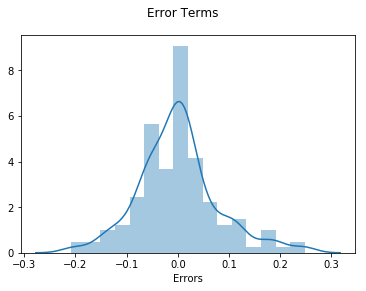

In [51]:
# Checking if the error terms are also normally distributed
y_train_pred = lr16.predict(X_train16_sm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')
plt.xlabel('Errors')     

Error terms are normally distributed. Hence, the assumption is correct.

In [52]:
# Scaling all numerical variables of df_test
df_test[num_var]=mms.transform(df_test[num_var])

C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anupama\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
# Splitting the test dataframe into independent variables and dependent variable
y_test = df_test['price']
X_test = df_test.drop('price',axis=1)

In [54]:
# Creating X_test_new dataframe by dropping variables from X_test which are not in X_train_16
X_test_new = X_test[X_train_16.columns]
X_test_new = sm.add_constant(X_test_new)

# Making predictions based on X_train_16
y_pred = lr16.predict(X_test_new)

C:\Users\Anupama\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8623422346644796

The r squared value of the prediction model is similar to the r squared value of the train model which is 0.866

Text(0, 0.5, 'y_pred')

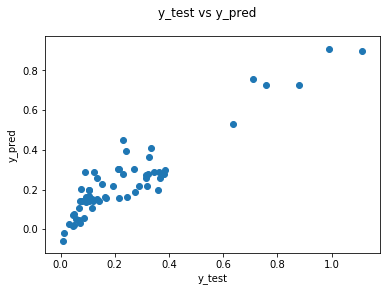

In [56]:
# Plotting y_test and y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')